# K- Means Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#To load the iris data

In [3]:
iris = datasets.load_iris()
iris_dataframe = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


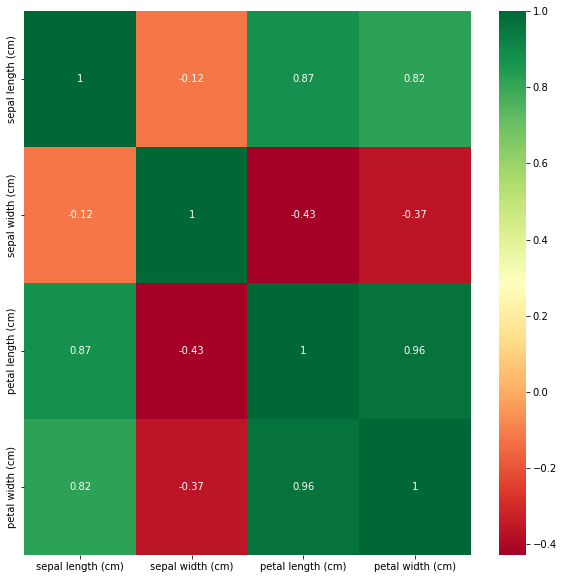

In [19]:
## Finding Correlations
import seaborn as sns
import matplotlib.pyplot as plt
# To obtain correlations of each features in dataset
corrmat = iris_dataframe.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(iris_dataframe[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
df=pd.DataFrame(iris_dataframe)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


To find the optimum number of clusters for k-means classification

In [6]:
#To find the most favourable no. of clusters for the k-mean classification

In [7]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    errors.append(kmeans.inertia_)

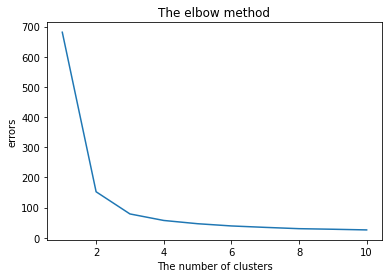

In [8]:
#Elbow method
import matplotlib.pyplot as plt
plt.plot(range(1, 11), errors)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('errors') 
plt.show()

From the above graph,the optimum clusters is where the elbow occurs and this happens when the  within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.


In [9]:
#Let us consider the no. of cluster as 3

In [10]:
#Here we will apply the KMean to the Iris Dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

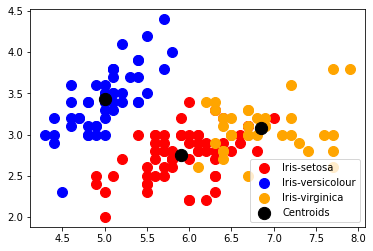

In [11]:
# To visualize cluster on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'orange', label = 'Iris-virginica')
#  To plot the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 150, c = 'black', label = 'Centroids')
plt.legend()